In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data

np.random.seed(20180427)

Instructions for updating:
Use the retry module or similar alternatives.


In [2]:
mnist = input_data.read_data_sets("C:/tf_workspace/3.Classification/data/", one_hot = True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting C:/tf_workspace/3.Classification/data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting C:/tf_workspace/3.Classification/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting C:/tf_workspace/3.Classification/data/t10k-images-idx3-ubyte.gz
Extracting C:/tf_workspace/3.Classification/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [3]:
x = tf.placeholder(tf.float32, [None, 784])
w = tf.Variable(tf.zeros([784, 10]))
w0 = tf.Variable(tf.zeros([10]))

f = tf.matmul(x, w) + w0
p = tf.nn.softmax(f)

In [4]:
t = tf.placeholder(tf.float32, [None, 10])
costFunction = -tf.reduce_sum(t * tf.log(p))
trainOptimizer = tf.train.AdamOptimizer()
train = trainOptimizer.minimize(costFunction)

In [5]:
prediction = tf.equal(tf.argmax(p, 1), tf.argmax(t, 1))
accuracy = tf.reduce_mean(tf.cast(prediction, tf.float32))

In [6]:
sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())

In [7]:
itrNum = 0
for _ in range(2000):
    itrNum += 1
    batch_xs, batch_ts = mnist.train.next_batch(100)
    sess.run(train, feed_dict={x: batch_xs, t: batch_ts})
    if (itrNum % 100 == 0):
        costFunctionValue, accuracyValue = sess.run([costFunction, accuracy],feed_dict={x:mnist.test.images, t: mnist.test.labels})
        print ('Step: %d, cost(loss): %f, accuracy: %f' % (itrNum, costFunctionValue, accuracyValue))

Step: 100, cost(loss): 7545.077148, accuracy: 0.848200
Step: 200, cost(loss): 5354.614258, accuracy: 0.879200
Step: 300, cost(loss): 4519.603027, accuracy: 0.892400
Step: 400, cost(loss): 4102.909668, accuracy: 0.900300
Step: 500, cost(loss): 3786.107910, accuracy: 0.901500
Step: 600, cost(loss): 3584.899902, accuracy: 0.906300
Step: 700, cost(loss): 3442.993408, accuracy: 0.909600
Step: 800, cost(loss): 3335.878906, accuracy: 0.911600
Step: 900, cost(loss): 3245.760254, accuracy: 0.911900
Step: 1000, cost(loss): 3186.563965, accuracy: 0.913100
Step: 1100, cost(loss): 3115.741943, accuracy: 0.916000
Step: 1200, cost(loss): 3063.348145, accuracy: 0.915900
Step: 1300, cost(loss): 3038.947266, accuracy: 0.915300
Step: 1400, cost(loss): 3002.756348, accuracy: 0.916400
Step: 1500, cost(loss): 2950.715332, accuracy: 0.917000
Step: 1600, cost(loss): 2928.645020, accuracy: 0.919200
Step: 1700, cost(loss): 2910.960938, accuracy: 0.918100
Step: 1800, cost(loss): 2877.976562, accuracy: 0.919900
S

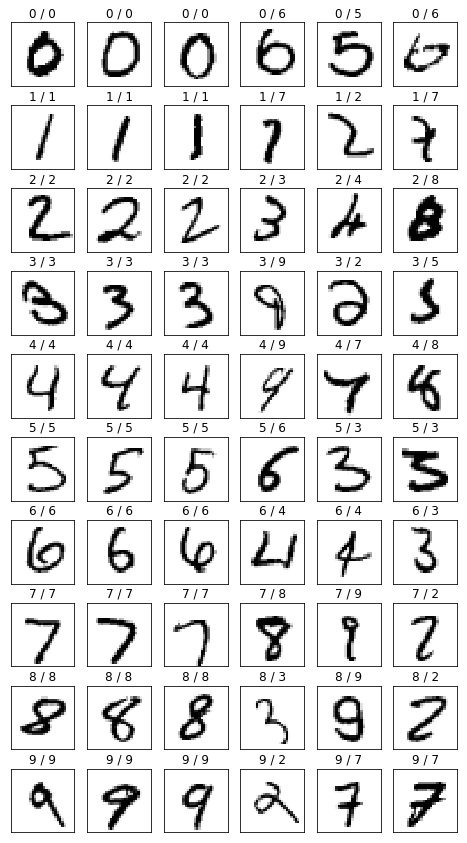

In [8]:
images, labels = mnist.test.images, mnist.test.labels
pValue = sess.run(p, feed_dict={x:images, t: labels}) 

fig = plt.figure(figsize=(8,15))
for i in range(10):
    c = 1
    for (image, label, pred) in zip(images, labels, pValue):
        prediction, actual = np.argmax(pred), np.argmax(label)
        if prediction != i:
            continue
        if (c < 4 and i == actual) or (c >= 4 and i != actual):
            subplot = fig.add_subplot(10,6,i*6+c)
            subplot.set_xticks([])
            subplot.set_yticks([])
            subplot.set_title('%d / %d' % (prediction, actual))
            subplot.imshow(image.reshape((28,28)), vmin=0, vmax=1, cmap=plt.cm.gray_r, interpolation="nearest")
            c += 1
            if c > 6:
                break